
# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset taken from movie data base (TMDB) contains information about `10,000 movies` collected from The Movie Database (TMDb), including user ratings and revenue.
features (column name for every row )
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>cast</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj (budget in tems 2010 dollars) </li>
    <li>revenue_adj (revenue in tems 2010 dollars)</li>
</ul>
<p> in this report i will explain some question to get insight from data </p>
<ol>
    <li> Which genres are most popular from year to year?</li>
    <li> How is popularity trending over time?</li>
    <li> What kinds of properties are associated with movies that have high revenues?</li>
    <li> which years have high revenues</li>
    <li> How are revenues trending over time?</li>
    <li> Do top ratings movies always generate big revenue?</li>
    <li> Is there a relation between popularity and revenue for directors? </li>
</ol>

In [1]:
#import necesery library 
import numpy as np # for numerical computing
import pandas as pd # for data wrangling and analysis 
import matplotlib.pyplot as plt # foe data visualization 
import seaborn as sns #for better data visualization 
import os # to handle with opearting system 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
files = os.listdir(os.getcwd())
print(files)

['tmdb-movies.csv', 'Investigate_a_Dataset.html', '.ipynb_checkpoints', 'Untitled.ipynb', 'Investigate_a_Dataset.ipynb']


<a id='wrangling'></a>
## Data Wrangling

> in this step we will read data and see some important details about data such missing values and data types 

### General Properties

In [3]:
data = pd.read_csv("tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#check null values of data 
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# check null using percantage 
def show_prec_of_null(df ):
    '''this function show precantage of null values in data frame 
    Args :
        data (DataFrame) : data we want to show missing values 
    Returns :
        prec_null (Series) : has details about missing values 
    '''
    prec_null = df.apply(lambda x:np.round((x.isnull().sum()/df.shape[0])*100 ,2))
    prec_null.sort_values(ascending=False , inplace=True)
    return prec_null


In [6]:
prec_null = show_prec_of_null(data)
prec_null

homepage                72.98
tagline                 25.99
keywords                13.74
production_companies     9.48
cast                     0.70
director                 0.40
genres                   0.21
imdb_id                  0.09
overview                 0.04
popularity               0.00
budget                   0.00
revenue                  0.00
original_title           0.00
revenue_adj              0.00
budget_adj               0.00
runtime                  0.00
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
id                       0.00
dtype: float64

droped columns that have contains heights null values and columns that didn't impact on our dataset and not important in this 
beginner task such `id` , `imdb_id` , `homepage` , `tagline` , `keywords` but we keep `tagline` , `keywords` it might be 
very useful to get insight from data and then drop it 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (handle with missing value , check data type , duplicated rows and more )

In [8]:
def droped_missing(df , droped_columns , inplace =True):
    '''droped specifi columns that contain missing values
    Args :
        df (DataFram) : data we handle with 
        droped_columns (list) : columns we dropped
        inplace (bool) : True ==> returned modified data , False ==> return a new dataframe
    Returns :
        df after modifing 
    '''
    if inplace :
        return df.drop(droped_columns , axis =1 , inplace = inplace )
    else :
        df = df.drop(droped_columns , axis =1 , inplace = False )
        return df 

In [9]:
print("data shape before dropping is " , data.shape)
droped_missing(data  , ['id' ,'imdb_id' , 'homepage' ] , inplace=True)
print("data sape after dropping is " , data.shape)

data shape before dropping is  (10866, 21)
data sape after dropping is  (10866, 18)


check correct `data type` to make a specific function on columns to do well 

In [10]:
data.head(2).append(data.dtypes , ignore_index =True).rename({0:"ex1" , 1:"ex2" , 2:"dtype"}).T

,ex1,ex2,dtype
popularity,32.9858,28.4199,float64
budget,150000000,150000000,int64
revenue,1513528810,378436354,int64
original_title,Jurassic World,Mad Max: Fury Road,object
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,object
director,Colin Trevorrow,George Miller,object
tagline,The park is open.,What a Lovely Day.,object
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,object
overview,Twenty-two years after the events of Jurassic ...,An apocalyptic story set in the furthest reach...,object
runtime,124,120,int64


In [11]:
#the columns will be converted is release_data it will convert from object to datetime 
data['release_date'] = pd.to_datetime(data['release_date'])
data.head(2).append(data.dtypes , ignore_index =True).rename({0:"ex1" , 1:"ex2" , 2:"dtype"}).T

,ex1,ex2,dtype
popularity,32.9858,28.4199,float64
budget,150000000,150000000,int64
revenue,1513528810,378436354,int64
original_title,Jurassic World,Mad Max: Fury Road,object
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,object
director,Colin Trevorrow,George Miller,object
tagline,The park is open.,What a Lovely Day.,object
keywords,monster|dna|tyrannosaurus rex|velociraptor|island,future|chase|post-apocalyptic|dystopia|australia,object
overview,Twenty-two years after the events of Jurassic ...,An apocalyptic story set in the furthest reach...,object
runtime,124,120,int64


now datatype for columns is more correct 

### check `duplicated values ` 

In [12]:
data.duplicated().sum()

1

In [13]:
print("data shape before removing duplicated values" , data.shape)
data.drop_duplicates(inplace =True)
print("data shape after removing duplicated values" , data.shape)

data shape before removing duplicated values (10866, 18)
data shape after removing duplicated values (10865, 18)


<a id='eda'></a>
## Exploratory Data Analysis

>  in this step we will see more insights from data and make data tell us what it is contains and do some EDA to see 
coorelation and some visualization from data .

### Research Question 1 Which genres are most popular from year to year?

In [14]:
#let us to build some important functions we will need 
def plot_count(col , df  , head, figsize):
    plot_data = df[col].value_counts().head(head)
    plt.figure(figsize =figsize)
    sns.barplot(y =plot_data.index , x = plot_data.values)
    plt.xlabel("count")
    plt.ylabel(col)
    plt.title(f"count of {col} accroding to dataset")
    plt.show()

    
##############################################################
def plot_hist(df , col  ):
    '''this function plot histogram plot for contiunies columns'''
    mu  , sigma=df[col].mean() , df[col].std() #calc mean and standrad deviation
    sns.distplot(df[col] )
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel("frequency")
    plt.show()
 #############################################################
def plot_line(x , y , method ="count" ):
    '''this function plot line plot to show how data change from year to anthor
    Args :
        x ==> timeseries column
        y==> numerical column
    '''
    plt.figure(figsize=(8 , 6))
    if method =="count":
        plot_data =data.groupby(x)[y].count()
    elif method=="mean":
        plot_data =data.groupby(x)[y].mean()
    plot_data.plot(kind ="line")
    plt.xlabel("Year")
    plt.ylabel(f"number of {y}" if method=="count" else f"mean of {y}")
    plt.title("movie accroding to year")
    plt.show()

In [15]:
genres_count =data['genres'].value_counts().sort_values(ascending =False) 
genres_count.head(20) #see top 20 count of  genres in data set

Drama                   712
Comedy                  712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Crime|Drama|Thriller     81
Crime|Drama              74
Comedy|Horror            72
Drama|Comedy|Romance     64
Action                   63
Name: genres, dtype: int64

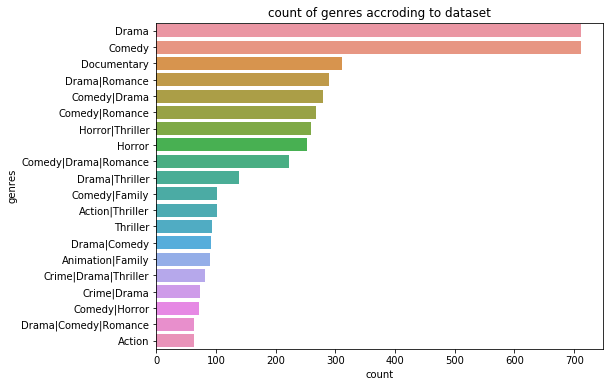

In [16]:
plot_count("genres" , data , head =20 , figsize=(8 ,6)) #visualize top 20 of genres 

the most geners is `Drama` , `Comady` , `Documentary` , `Drama|Romance` and `Horror|Thriller` 

In [17]:
#the most type that haven't seen much in this dataset 
for type in genres_count.tail(20).index :
    print(type)
    print("-"*len(type))

Action|Fantasy|Horror|Science Fiction|Thriller
----------------------------------------------
Drama|Science Fiction|Family
----------------------------
Action|Family
-------------
Action|Science Fiction|Horror
-----------------------------
Comedy|Thriller|Crime|Foreign
-----------------------------
Action|Animation|Family|Fantasy|Science Fiction
-----------------------------------------------
Mystery|Drama|Horror|Science Fiction
------------------------------------
Comedy|Drama|Family|Fantasy|Foreign
-----------------------------------
Comedy|Science Fiction|Thriller|Adventure
-----------------------------------------
Romance|Action|Adventure|Western|Drama
--------------------------------------
Drama|Action|Science Fiction|Thriller
-------------------------------------
Drama|Action|Adventure|Crime|Thriller
-------------------------------------
Thriller|Action|Comedy|Science Fiction
--------------------------------------
Adventure|Comedy|Fantasy|Family
-------------------------------
Co

In [18]:
release_year_count = data['release_year'].value_counts()
release_year_count.head(20)

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
Name: release_year, dtype: int64

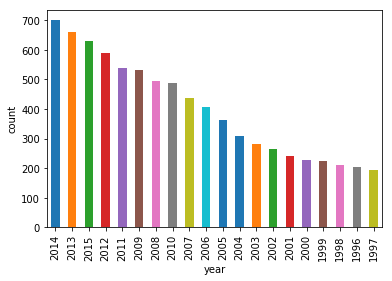

In [19]:
#show the most year thar have a lot of moviews accroding to dataset
release_year_count.head(20).plot(kind ="bar") 
plt.xlabel("year")
plt.ylabel("count")
plt.show()

most year that movies are puplished accreoding to dataswt is `2014` , `2013` and `2015`

In [20]:
#check if there are missing year betwwen this period 
(data["release_year"].max()-data['release_year'].min()+1)==data["release_year"].nunique()

True

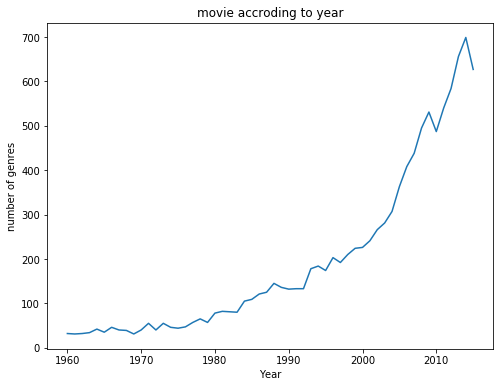

In [21]:
#see how movies incresed or decresed by year
plot_line(x="release_year" , y ="genres" , method = "count")

now let's show what movie are most popular from year to anthor

## Research Question 1 Which genres are most popular from year to year?

In [22]:
#see the most frequent geners par year 
from scipy.stats import mode 
def Mode(x):
    return mode(x)[0]
most_viewed =data.groupby("release_year")['genres'].agg(Mode)

#frequent of most view
def Frequent(x):
    return mode(x)[1]
frequent_of_views = data.groupby("release_year")['genres'].agg(Frequent)

#concat this columns to visualize 
res = pd.DataFrame(columns =['release_year' , 'geners_type' , "geners_count"])
res["release_year"]= most_viewed.index
res["geners_type"]= most_viewed.values
res["geners_count"]= frequent_of_views.values
res.head()

,release_year,geners_type,geners_count
0,1960,Horror,3
1,1961,Drama,3
2,1962,Drama,4
3,1963,Horror,3
4,1964,Comedy|Romance,5


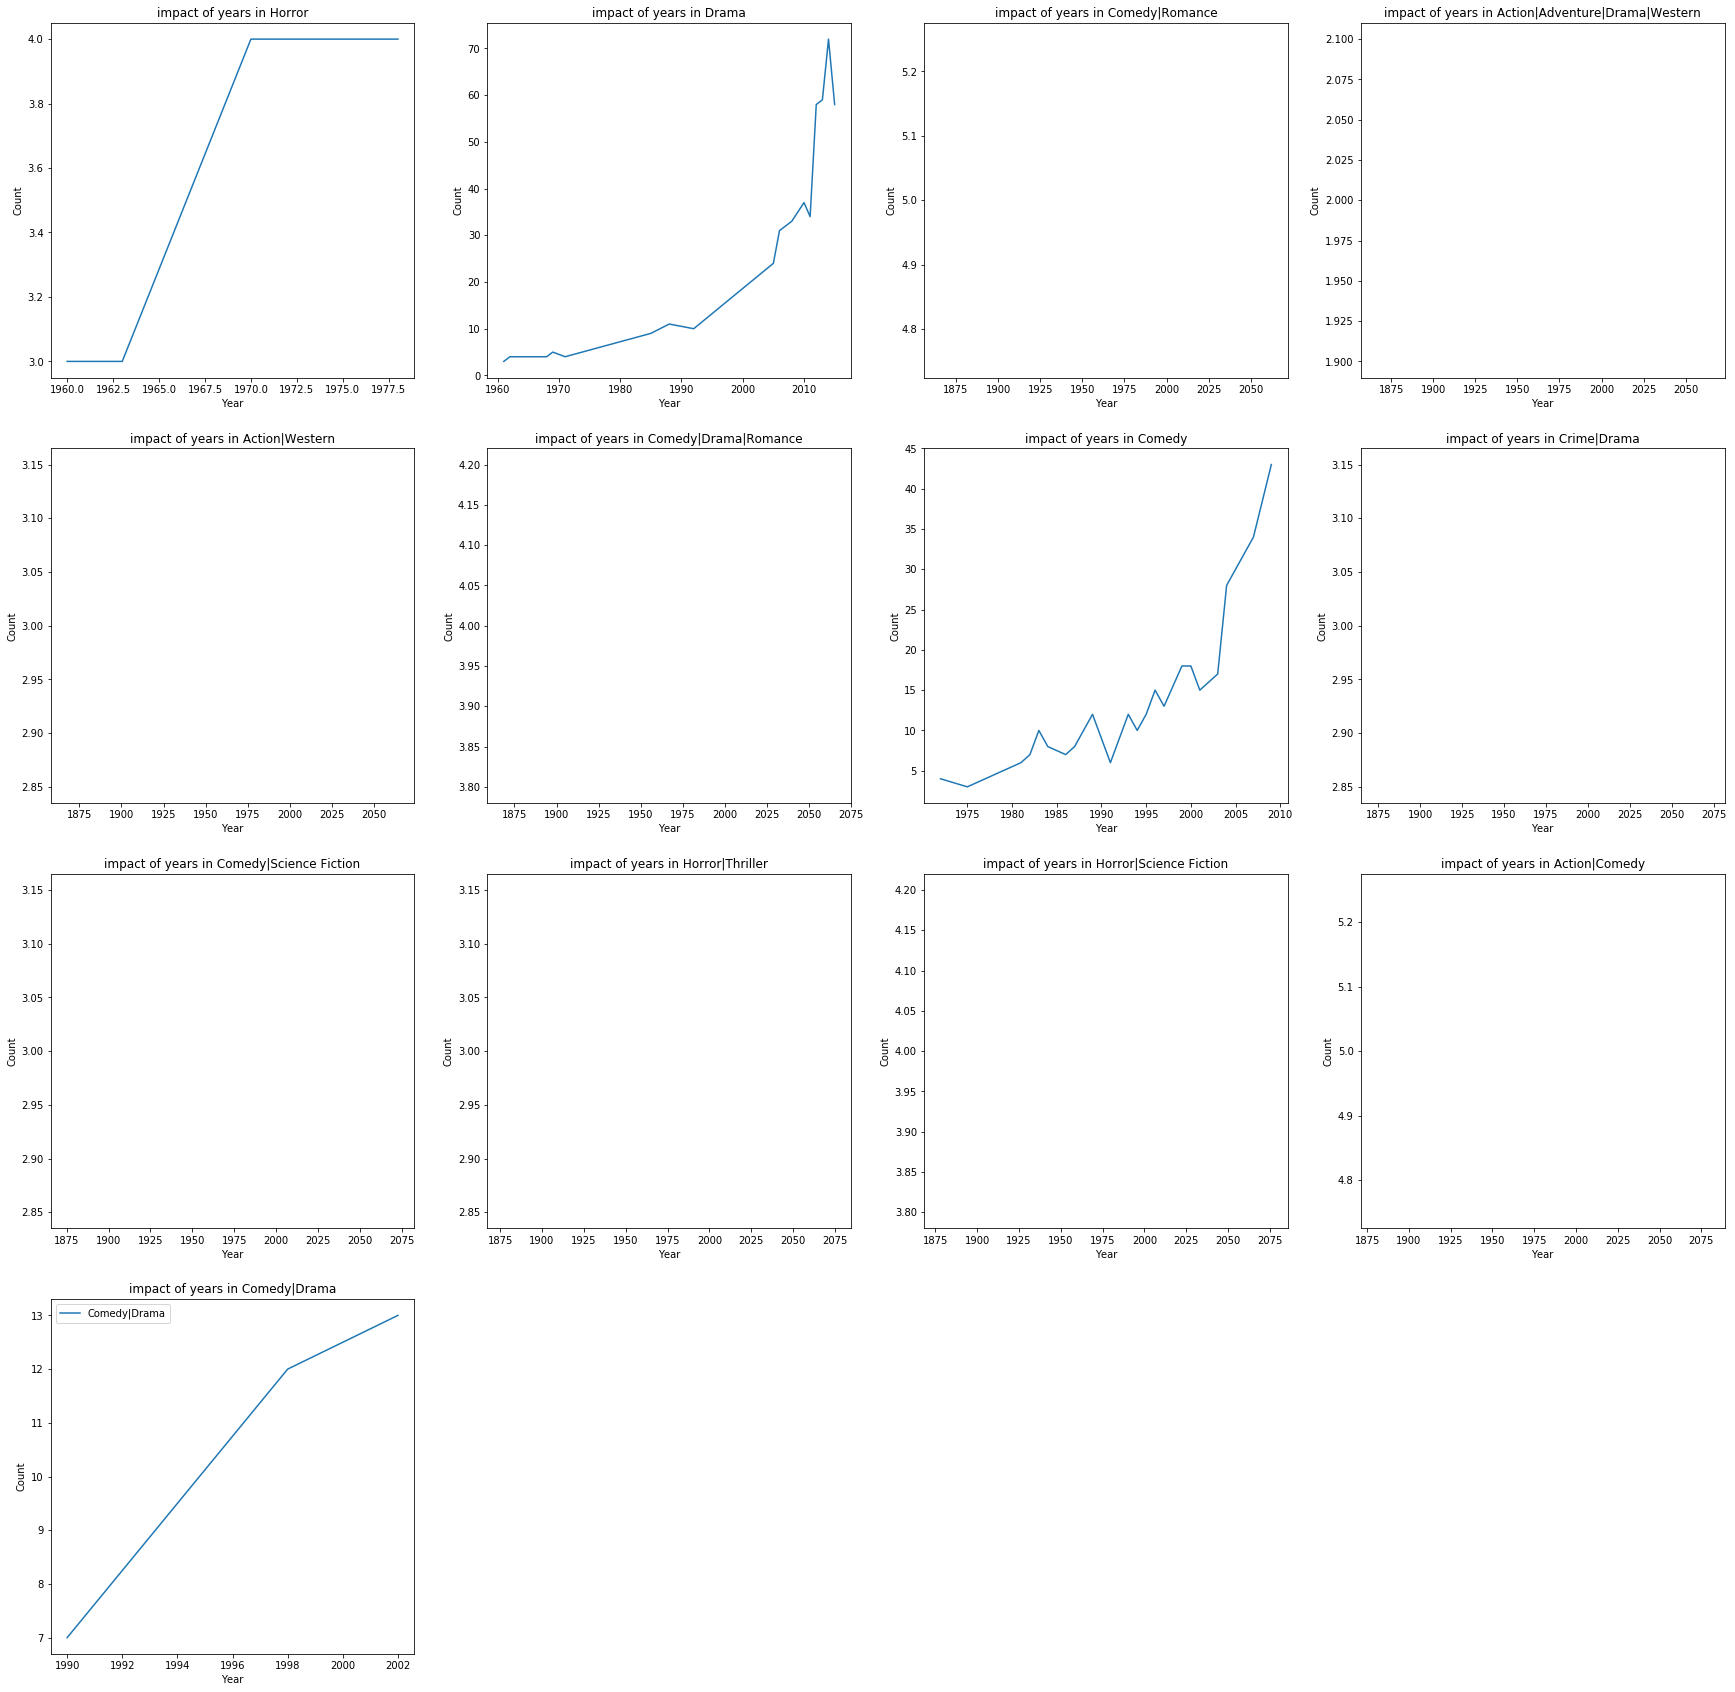

In [23]:
types = res['geners_type'].unique() #show unique values of geners to visualze
plt.figure(figsize=(30 , 30))
for i , type in enumerate(types):
    plt.subplot(len(types)//3 , 4, i+1)
    df = res.query(f"geners_type=='{type}'") # returned df that contain a pecific type of geners 
    plt.plot(df['release_year'] , df['geners_count'] , label = type)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"impact of years in {type}")
plt.legend()
plt.show()

as we see in this chart the most geners has increased every year is `drama` , `comedy` , `action|comdy` 
and `Comedy|Drama`  but ,`Horror` have no change 1970 
and i think if we are collect more data the results will be much clean 

##  Question 2 How is popularity trending over time?

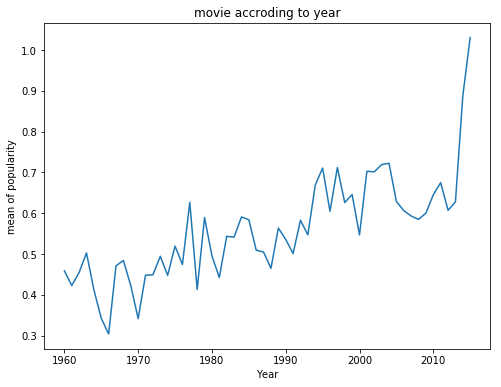

In [24]:
plot_line(x="release_year" , y ="popularity" , method="mean")

populartity increased over time

### Research Question 3  What kinds of properties are associated with movies that have high revenues?

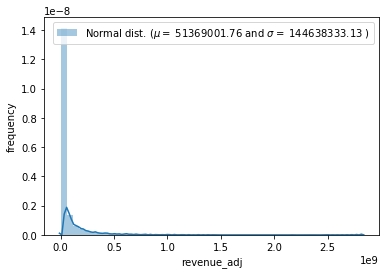

In [25]:
#first see hist plot of revenues
plot_hist(col ="revenue_adj" , df = data )

`revenue_adj` most of values betwwen 0.1 and 0.4 * 1e9

In [26]:
#seee most views of genres in dataset and average of them  
heights_moviews =data.groupby("genres")["revenue_adj"].mean()\
.sort_values(ascending = False).apply(lambda x:f"{np.round(x,1):,}").head(20)
heights_moviews

genres
Horror|Thriller|Adventure                            1,907,005,841.9
Science Fiction|Adventure|Family|Fantasy             1,791,694,309.2
Crime|Drama|Mystery|Thriller|Action                  1,583,049,536.4
Family|Animation|Drama                               1,159,591,590.0
Family|Fantasy|Adventure                             1,025,467,110.0
Adventure|Fantasy|Family|Mystery                       986,688,860.4
Action|Adventure|Science Fiction|Fantasy               951,361,564.9
Action|Thriller|Science Fiction|Mystery|Adventure      825,500,000.0
Science Fiction|Thriller|Action|Adventure              793,216,615.0
Adventure|Action|Science Fiction                       788,260,200.0
Fantasy|Action                                         783,896,907.1
Animation|Family|Comedy|Adventure|Fantasy              783,306,265.9
Adventure|Comedy|Science Fiction|Family                772,572,771.7
Comedy|Adventure|Fantasy|Animation|Family              752,600,867.0
Comedy|Music|Family|Fantasy

heighset geners that have more revenue_adj are `Horror|Thriller|Adventure` , `Science Fiction|Adventure|Family|Fantasy` , 
`Crime|Drama|Mystery|Thriller|Action` and `Family|Fantasy|Adventure`

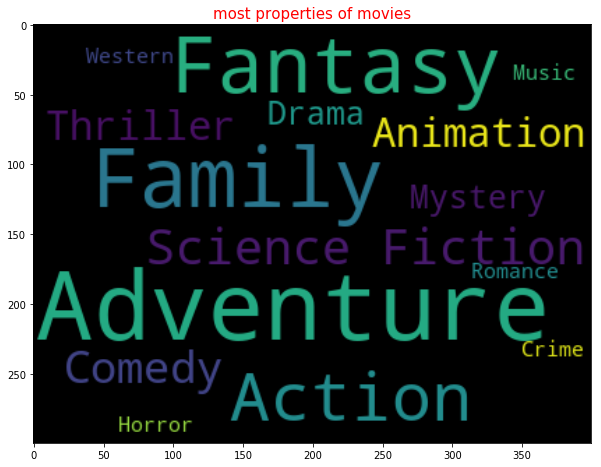

In [27]:
import wordcloud 
def show_top_words(series , split =" "):
    '''show heighst words in a specific series'''
    words =series.index.str.split(split) #split words accreoding a specific sign
    all_words =[]
    for lis in words :
        all_words.extend(lis)

    word_image=wordcloud.WordCloud(height=300 , width=400  , margin =0).generate(" ".join(all_words))
    plt.figure(figsize=(10 , 10))
    plt.imshow(word_image  , interpolation="bilinear")
    plt.title("most properties of movies" , fontsize =15 , color ="r")
    plt.show()
show_top_words(heights_moviews , split="|")

the most properties is movies related with `Adventure` , `fantasy` , `family` , `Action` , `comedy` and more that are be in 
the follwing chart

## Question 4 :  which  `years` have `high revenues` ?

In [28]:
revenue_par_year =data.groupby("release_year")['revenue_adj'].mean()\
.sort_values()\
.apply(lambda x:f"{np.round(x , 2):,}$").head(20)
revenue_par_year

release_year
1966    12,375,267.86$
2014     32,016,006.7$
1960    33,409,910.82$
2013     35,088,656.2$
2015    39,143,789.58$
1963    39,245,798.14$
1971    39,645,864.69$
2008    39,677,744.17$
2012    39,844,726.54$
2009    42,296,313.29$
2011    42,537,889.06$
1968    42,553,882.55$
2006    43,149,424.81$
2010    44,905,994.98$
2007    46,608,771.86$
1969    46,778,881.08$
1988    47,553,960.23$
1962    48,562,384.35$
1986    49,369,804.65$
2005    50,665,087.21$
Name: revenue_adj, dtype: object

In [29]:
print("years has most revenue is" , *revenue_par_year.index.tolist())

years has most revenue is 1966 2014 1960 2013 2015 1963 1971 2008 2012 2009 2011 1968 2006 2010 2007 1969 1988 1962 1986 2005


## Question 5 How are revenues trending over time?


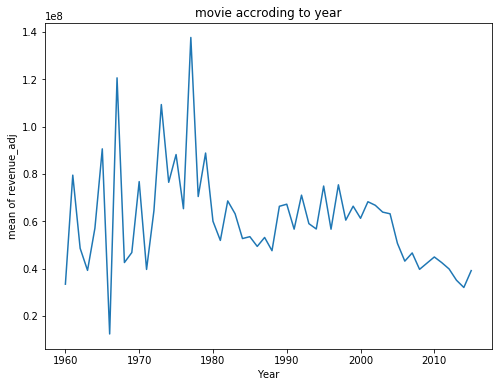

In [30]:
plot_line(x="release_year" , y ="revenue_adj" , method="mean" )

revenue_adj is decresed from 2000 to 2010 and the years before it it is oscilated (incresed sometimes and decereased other)

## Question 6 Do top ratings movies always generate big revenue?


In [31]:
top_rated = data.genres.value_counts().sort_values(ascending =False)\
.head(20).index.tolist()
data_top  = data.query(f'genres in {top_rated}')

In [32]:
data_top.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
23,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,Sam Taylor-Johnson,Are you curious?,based on novel|billionaire|bdsm|woman director...,When college senior Anastasia Steele steps in ...,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,2015-02-11,1865,5.3,2015,3.679998e+07,5.240791e+08
24,4.648046,28000000,133346506,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,Adam McKay,This is a true story.,bank|fraud|biography|wall street|finances,The men who made millions from a global econom...,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,2015-12-11,1545,7.3,2015,2.575999e+07,1.226787e+08
25,4.566713,150000000,682330139,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,Christopher McQuarrie,Desperate Times. Desperate Measures.,spy|sequel|mission,Ethan and team take on their most impossible m...,131,Action,Paramount Pictures|Skydance Productions|China ...,2015-07-23,2349,7.1,2015,1.379999e+08,6.277435e+08
26,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,"Ted is Coming, Again.",sperm bank|sequel|buddy|courthouse|teddy bear,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,2015-06-25,1666,6.3,2015,6.255997e+07,1.985944e+08
35,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,Love knows no boundaries,based on novel|carpet|isolation|imprisonment|g...,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520,8.0,2015,5.519998e+06,3.256960e+07


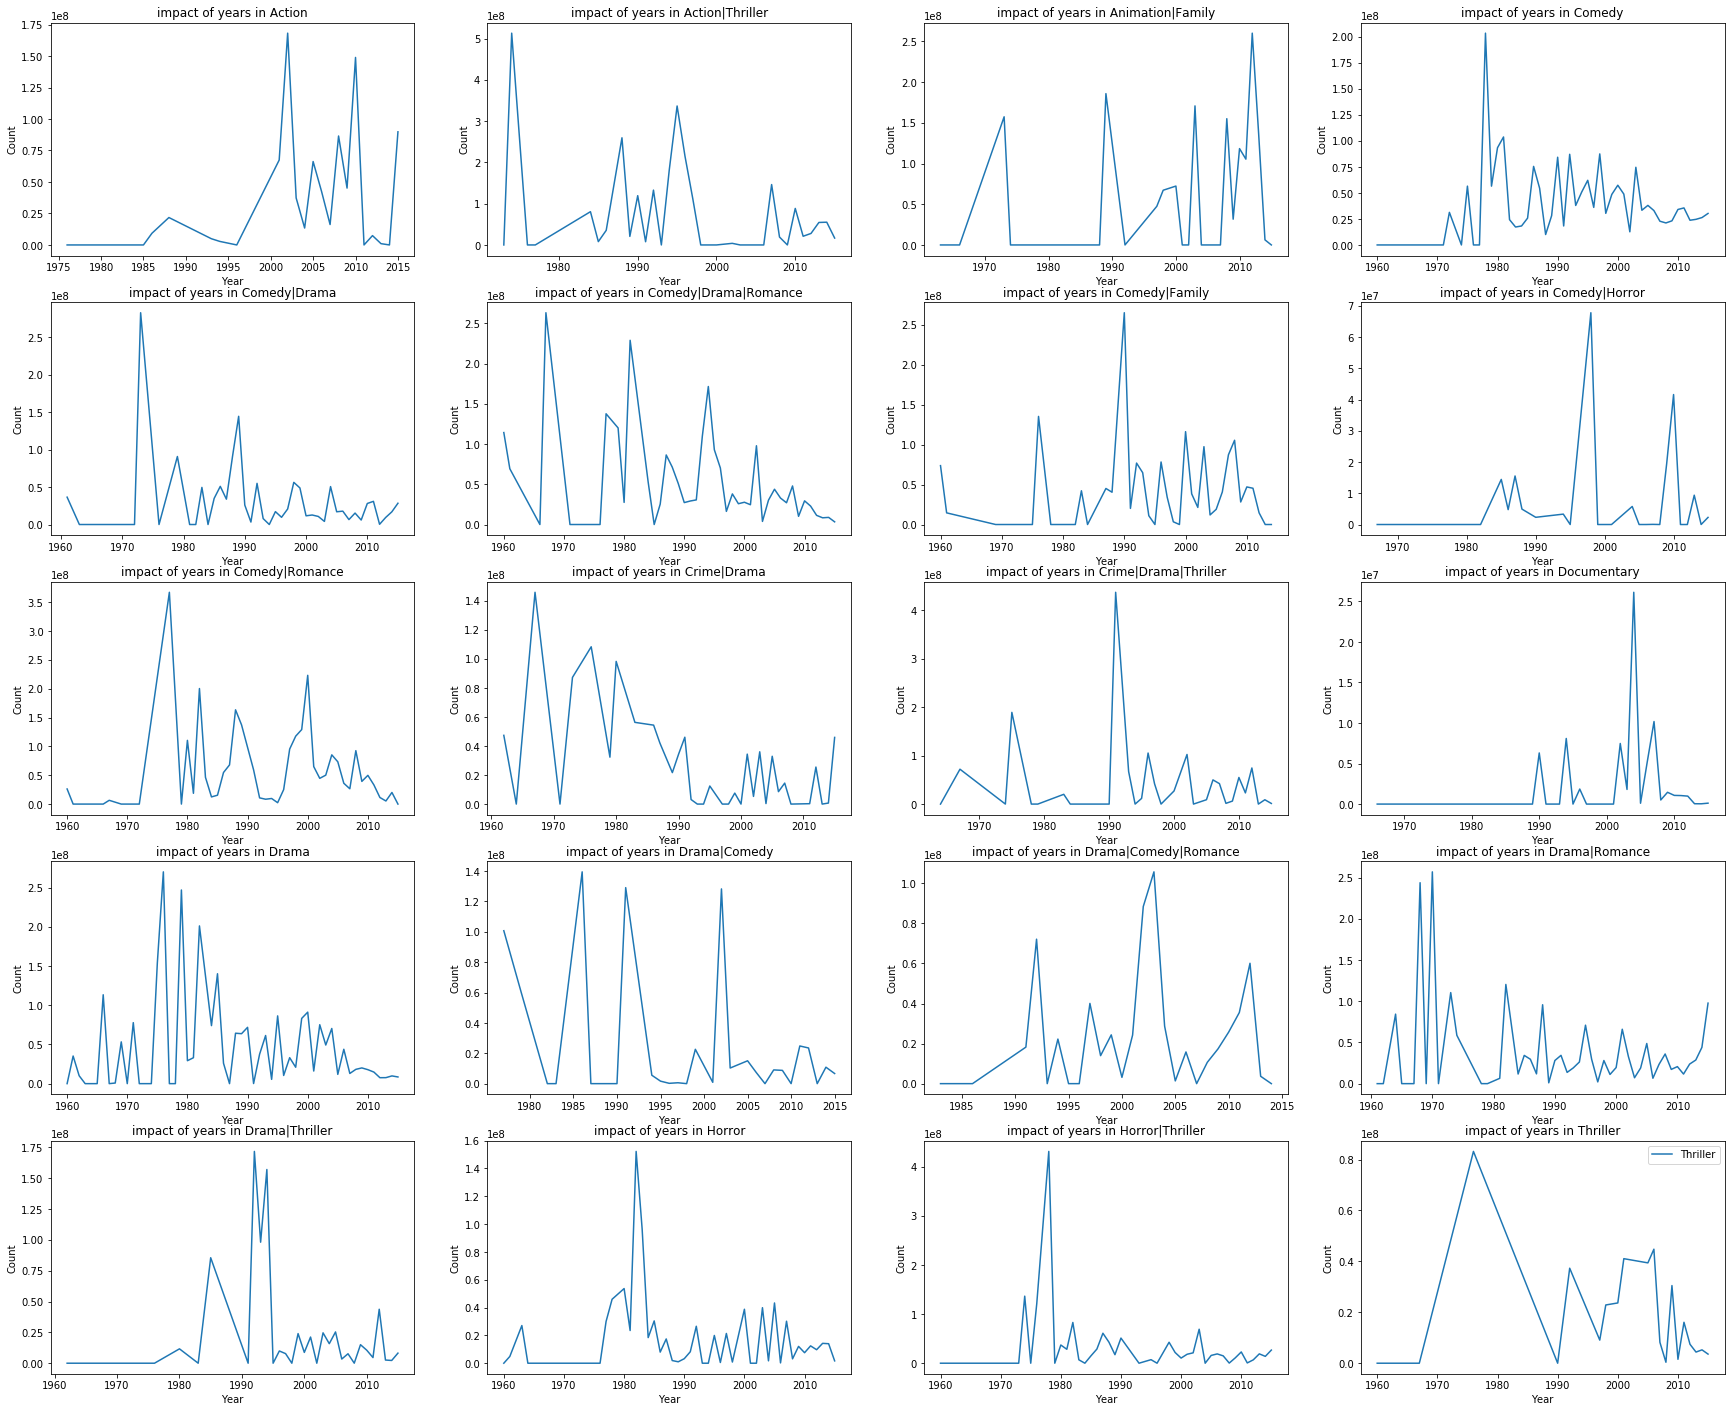

In [33]:
plot_data =data_top.groupby(["genres" , "release_year"])["revenue_adj"].mean().reset_index()
types = plot_data['genres'].unique() #show unique values of geners to visualze
plt.figure(figsize=(30 , 30))
for i , type in enumerate(types):
    plt.subplot(len(types)//3 , 4, i+1)
    df = plot_data.query(f"genres=='{type}'") # returned df that contain a pecific type of geners 
    plt.plot(df['release_year'] , df['revenue_adj'] , label = type)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"impact of years in {type}")
plt.legend()
plt.show()

NO , top ratings movies didn't have ant correlation of  revenue?


## Quesstion 7 Is there a relation between popularity and revenue for directors? etc.


In [34]:
plot_data = data.groupby(["director"])[["popularity" , "revenue_adj"]].mean()

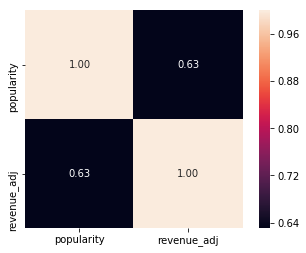

In [35]:
corr = plot_data.corr()
sns.heatmap(corr , square =True , fmt =".2f" , annot =True)
plt.show()

there are a correlatio between `popularity` and `revenue_adj` according to `director`

<a id='conclusions'></a>
## Conclusions
before we discuss result i will mention some of guidline in this dataset and what i have noticed 
#### GUIDANCE ON LIMITATIONS
<h5>data is enough or not ? </h5>
- first some of genres havn't much data there are a bias for some of genres type we must collect more data of genres to 
make percentage of every genres type normally approxiamtly such (Horror|Science Fiction|Crime , Horror|Thriller|Comedy|Crime ,
and more i will be mention in results of analytics therfore there are some question has a nbad effect such which genres have 
much populartity or intreastin or reveunue so i suggest to collect more data 
 so data  not sufficient to prove our findings
 <h5>missing value impact on our analysis or not ? </h5>
 
 - i think missing value in some of columns didn't impact on our data such homepage  and imbd_id but things such tagline , keywords it can give an insight it will be useful if we make text analysis it may be give a strong value 
 <br>
<h5>what features if it be it will be useful in analysis ? </h5>
 
 - if we have fetures about age  of people we can make a great analysis to see which age admire to every type of specific genres of movies to focus more on age and know what every interval of ages needs of genres of movies
 
 - also if we have a columns about heror we will know which hero make pepole more intreasted of their film or movie and give 
 more watching and reveunue we will focus to produce films for this hero 
 finally of this topic there are years have a more data and other didn't have i think we must to collect more data 
 and make a vraiance and collect more to make precantage of every genres or year normally equalivant 
 ### result we reach in this dataset 
 
-in first part of our analysis we see that the most movies have seen are Drama , Comady , Documentary , Drama|Romance and Horror|Thriller it the most genres people are intersted 
- in this dataset number of genres are increased every year according to dataset 
- most geners has increased every year is drama , comedy , action|comdy and Comedy|Drama but ,Horror have no change 1970 and i think if we are collect more data the results will be much clean
- this type of movies Horror|Science Fiction|Crime  , Horror|Thriller|Comedy|Crime , TV Movie|Animation|Adventure , 
Action|Comedy|Drama|Fantasy|Science Fiction and Adventure|Drama|Action|History|Thriller hasn't have popularity or intrested in dataset 
so i suggest to focus the type i have mention above that have heigh intreasted
- most of values in  revenue_adj are betwwen 0.1 and 0.4 * 1e9
- if we dive into revenue_adj to see which has big revenue_adj are `Horror|Thriller|Adventure` , `Science Fiction|Adventure|Family|Fantasy` , `Crime|Drama|Mystery|Thriller|Action and Family|Fantasy|Adventure`
- according to best movies common properties ` Adventure` , `fantasy` , `family` , `Action` , `comedy` 
- revenue_adj is decresed from 2000 to 2010 and the years before it it is oscilated (incresed sometimes and decereased other)
- however the top movies also we must collect more data 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1